In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model as lm

In [34]:
buildings = pd.read_csv('Houses_Sold.csv')
buildings.dropna(axis=0, inplace=True)

In [35]:
bb_freq = buildings.loc[(buildings['house_size'] <= 5000),].groupby(['bed','bath']).size().reset_index(name='count')
bb_freq = bb_freq.loc[(bb_freq['bed']) > (bb_freq['bath'])]
max_beds = np.min(bb_freq.loc[(bb_freq['count'] == 1),]['bed'])-1
print(f'maximum bedrooms are {max_beds}')
# max_baths = np.max(bb_freq['bath'])
# print(f'maximum bathrooms are {max_baths}')

maximum bedrooms are 12.0


In [36]:
houses = buildings.loc[ (buildings['bed'] <= max_beds) & (buildings['bed'] > buildings['bath']) & (buildings['house_size'] <= 5000) & (buildings['price'] > 1000), ]
# houses = buildings.loc[(buildings['bed'] < 7) & (buildings['bath'] < buildings['bed']),]
houses_ar = np.array(houses.select_dtypes(include=np.number).iloc[:,1:])

PCA to reduce dimensions of housing dataframe

In [37]:
h_scaled = StandardScaler().fit_transform(houses_ar)
pca = PCA(n_components=2)
pca.fit(h_scaled)
h_PCs = pca.fit_transform(h_scaled)

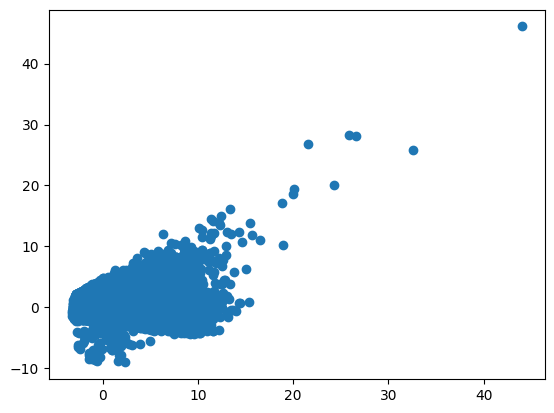

In [38]:
mask = h_PCs[:,0] < 10
plot_ar = h_PCs[mask]

fig, ax = plt.subplots()
ax.scatter(h_PCs[:,0], h_PCs[:,1])

Text(0.5, 0, 'House Square Footage')

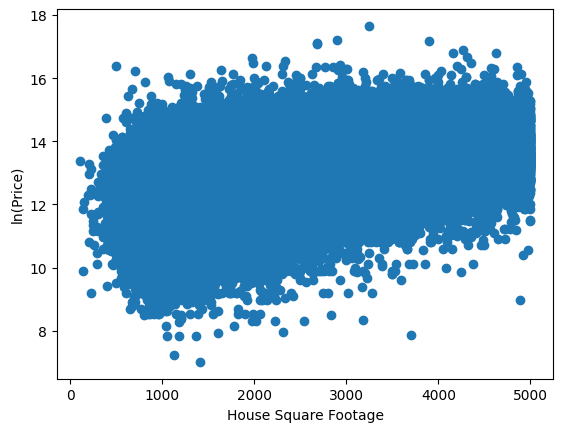

In [39]:
fig, ax = plt.subplots()
ax.scatter(houses['house_size'], np.log(houses['price']))
ax.set_ylabel('ln(Price)')
ax.set_xlabel('House Square Footage')

In [53]:
onehot_state = pd.get_dummies(houses['state'])
scale = StandardScaler()
scale.fit(np.array(houses[['house_size', 'acre_lot']]))
X = np.array(houses[['house_size', 'acre_lot']])
scale.fit(np.array(houses['price']).reshape(-1,1))
y = np.array(houses['price']).reshape(-1,1)

gamma = lm.GammaRegressor()
gamma.fit(X,y)
# gamma.score(X,y)

c:\Users\elang\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GammaRegressor()

In [54]:
gamma.coef_

array([4.38020710e-04, 1.55176292e-06])

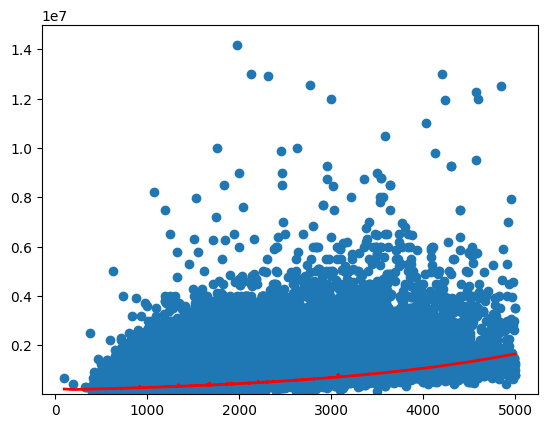

In [77]:
y_hat = gamma.predict(X)
mask = houses['state']=='California'
fig, ax = plt.subplots()
ax.scatter(houses.loc[mask,'house_size'], houses.loc[mask,'price'])
order = np.argsort(houses.loc[mask, 'house_size'])
ax.plot(houses.loc[mask,'house_size'].iloc[order], y_hat[mask][order], color='red', linewidth=2)
ax.set_ylim(0.001e7, 1.5e7)
plt.show()